In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)


In [3]:
# For default C = 1
lgr = LogisticRegression().fit(x_train, y_train)
print("Training set score:", lgr.score(x_train, y_train))
print("\nTest set score:", lgr.score(x_test, y_test))

Training set score: 0.9530516431924883

Test set score: 0.958041958041958


In [4]:
# Change C value and compare the performance metric
# increase C to 100
lgr100 = LogisticRegression(C=100).fit(x_train, y_train)
print("Training set score of lgr100:", lgr100.score(x_train, y_train))
print("\nTest set score of lgr100:", lgr100.score(x_test, y_test))

Training set score of lgr100: 0.971830985915493

Test set score of lgr100: 0.965034965034965


In [5]:
# For decrease C to 0.01
lgr001 = LogisticRegression(C=0.01).fit(x_train, y_train)
print("Training set score of lgr001:", lgr001.score(x_train, y_train))
print("\nTest set score of lgr001:", lgr001.score(x_test, y_test))

Training set score of lgr001: 0.9342723004694836

Test set score of lgr001: 0.9300699300699301


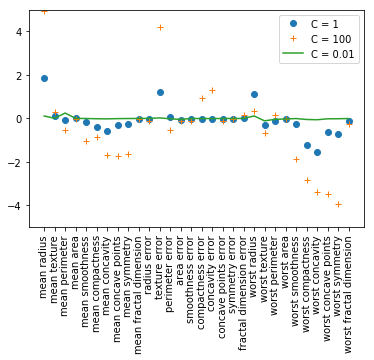

In [6]:
plt.plot(lgr.coef_.T, 'o', label='C = 1')
plt.plot(lgr100.coef_.T, '+', label='C = 100')
plt.plot(lgr001.coef_.T, '-', label='C = 0.01')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(-5, 5)
plt.legend()

plt.show()

If we desire a more interpretable model, using L1 regularization might help. As LogisticRegression applies an L2 regularization by default, the result looks similar to Ridge in Figure ridge_coefficients. Stronger regularization pushes coefficients more and more towards zero, though coefficients never become exactly zero.

In [7]:
import numpy as np
import math

In [8]:
n = np.arange(-2,3)
n

array([-2, -1,  0,  1,  2])

In [9]:
r = pow(float(10), n)
r

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])


Training accuracy of L1 LogRess with C = 0.010000: 0.917840

Test accuracy of L1 LogRess with C=0.010000: 0.930070

Training accuracy of L1 LogRess with C = 0.100000: 0.931925

Test accuracy of L1 LogRess with C=0.100000: 0.930070

Training accuracy of L1 LogRess with C = 1.000000: 0.960094

Test accuracy of L1 LogRess with C=1.000000: 0.958042

Training accuracy of L1 LogRess with C = 10.000000: 0.978873

Test accuracy of L1 LogRess with C=10.000000: 0.972028

Training accuracy of L1 LogRess with C = 100.000000: 0.985915

Test accuracy of L1 LogRess with C=100.000000: 0.979021


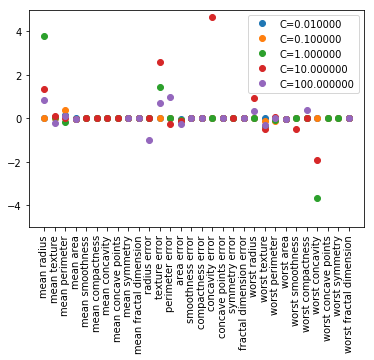

In [10]:
for C in r:
    lr_l1 = LogisticRegression(C = C, penalty="l1").fit(x_train, y_train)
    print("\nTraining accuracy of L1 LogRess with C = %f: %f" %(C, lr_l1.score(x_train, y_train)))
    print("\nTest accuracy of L1 LogRess with C=%f: %f" %(C, lr_l1.score(x_test, y_test)))
    plt.plot(lr_l1.coef_.T, 'o', label="C=%f"%C)

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(-5, 5)
plt.legend(loc = "best")

plt.show()

In [11]:
LogisticRegression?